## Task 1: Set up enviroment

In [1]:
## Import library
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import and merged into 1 files

path = 'D:\Dataa\Python\Casestudy\casestudy1'
all_files = glob.glob(os.path.join(path, "sales2019_*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)
df.to_csv( "merged.csv")

In [3]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Drop N/A rows and change to appropriate data type

In [5]:
df = df.dropna (how = 'all')

In [6]:
df = df[df['Quantity Ordered'] != 'Quantity Ordered']

In [7]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

## Task 2: Answer following questions:

#### 1./ What was the best month for sales? & How much earned that month? 

In [8]:
## Add months Col

df ['Month'] = df ["Order Date"].str.slice(start=0, stop=2)
df ['Month']

0         01
1         01
2         01
3         01
4         01
          ..
186845    09
186846    09
186847    09
186848    09
186849    09
Name: Month, Length: 185950, dtype: object

In [9]:
df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [10]:
## check values from column month and clean data 

print (set(df ['Month']))

{'06', '12', '07', '01', '05', '11', '03', '08', '04', '09', '02', '10'}


In [11]:
df[df['Month'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [12]:
df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [13]:
df ['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [14]:
 sales = df.groupby(['Month']).sum('Sales')['Sales']
 sales

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

=> Month 12 is the best month for sales and the values is 461.344 USD

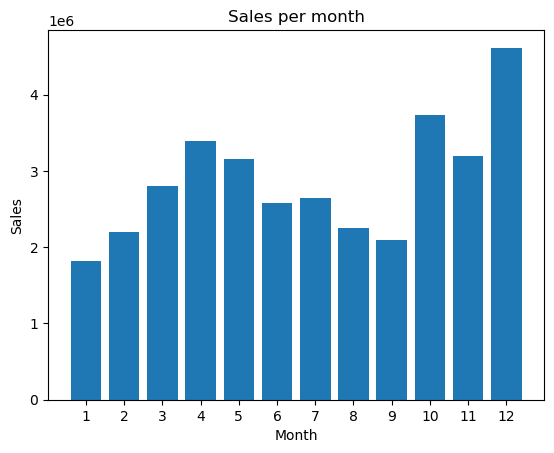

In [15]:
months = range(1,13)

plt.bar(x=months, height = sales)
plt.title('Sales per month')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#### 2./ What City have highest sales? & How much? 

In [16]:
df['City'] = df['Purchase Address'].str.split(',', expand = True)[1]
df['City']

0                 Boston
1               Portland
2          San Francisco
3            Los Angeles
4                 Austin
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185950, dtype: object

In [17]:
print (set(df ['City']))

{' Atlanta', ' San Francisco', ' Dallas', ' Seattle', ' Los Angeles', ' Austin', ' New York City', ' Portland', ' Boston'}


In [114]:
City_sales = df.groupby(['City'])['Sales'].sum().nlargest(10)
City_sales

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Sales, dtype: float64

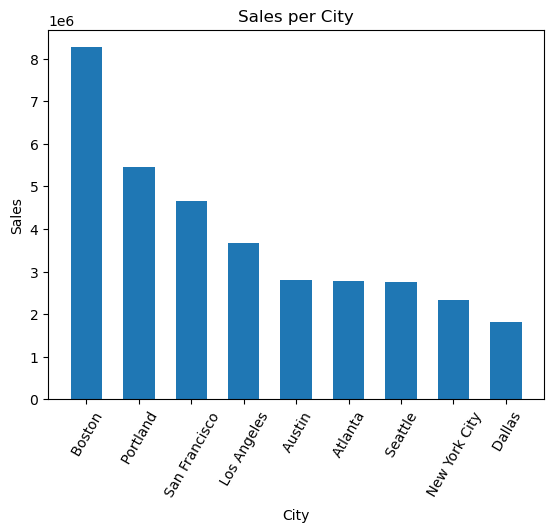

In [116]:
city = df ['City'].unique()

plt.bar(x=city, height = City_sales, width = 0.6 )
plt.title('Sales per City')
plt.xticks(city, rotation=60)
plt.xlabel('City')
plt.ylabel('Sales')

plt.show()

#### 3./ What time should we display ads to maximize the likelihood of customer's buying products?

In [48]:
df['Order Date'] =  pd.to_datetime(df['Order Date'])
df['Order Date']

0        2019-01-22 21:25:00
1        2019-01-28 14:15:00
2        2019-01-17 13:33:00
3        2019-01-05 20:33:00
4        2019-01-25 11:59:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [51]:
df['hour'] = df['Order Date'].dt.hour

In [63]:
hour_sales = df.groupby(['hour']).count()['Sales']
hour_sales

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

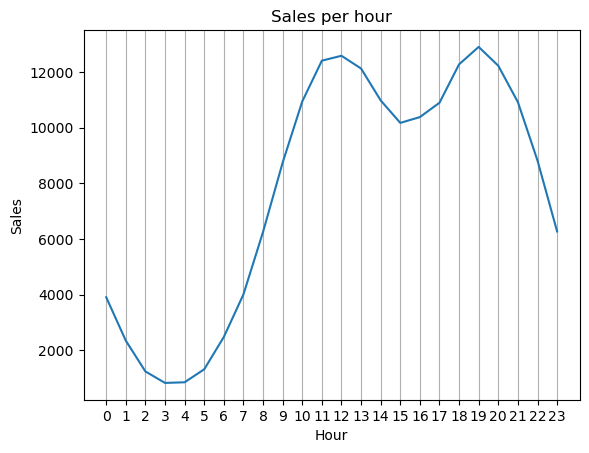

In [64]:
hours = [hour for hour , sales in hour_sales.items()]

plt.plot(hours, hour_sales)
plt.grid(axis = 'x')
plt.title('Sales per hour')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.show()

=> We should display add during 11-12am and 18-19pm as these are times that have the most order

#### 4./ What product are most often sold together?

In [65]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,Austin,11


In [73]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta,20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta,0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta,0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco,13


In [90]:
df_dup['Products'] = df_dup.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df_dup['Products'].drop_duplicates()

C:\Users\Acer\AppData\Local\Temp\ipykernel_8980\2693829322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Products'] = df_dup.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


41                 USB-C Charging Cable,Wired Headphones
57        Apple Airpods Headphones,AA Batteries (4-pack)
133                     Vareebadd Phone,Wired Headphones
153                    Google Phone,USB-C Charging Cable
220              Google Phone,Bose SoundSport Headphones
                               ...                      
170166                               20in Monitor,iPhone
175032                          LG Dryer,Vareebadd Phone
176840                 LG Dryer,Lightning Charging Cable
177793                          ThinkPad Laptop,LG Dryer
180004          LG Washing Machine,AA Batteries (4-pack)
Name: Products, Length: 366, dtype: object

In [85]:
Products = df_dup[['Order ID', 'Products']].drop_duplicates()
Products

,Order ID,Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [89]:
Products['Products'].value_counts().head(10)

iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: Products, dtype: int64

#### 5./ What are the most sales products? 

In [107]:
product_sold = df.groupby('Product').sum()['Quantity Ordered'].nlargest(20)
product_sold 

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

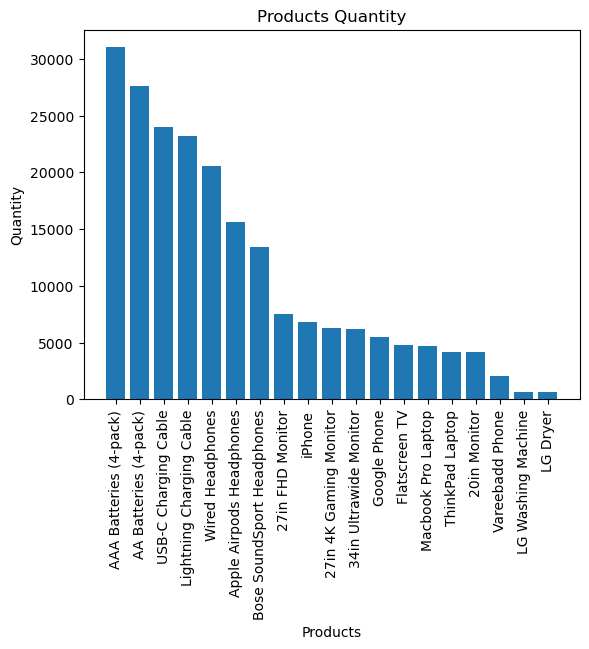

In [113]:
Products = [Product for Product , Quantity in product_sold.items()]

plt.bar(Products, product_sold )
plt.title('Products Quantity')
plt.xticks(Products, rotation=90)
plt.xlabel('Products')
plt.ylabel('Quantity')

plt.show()